In [9]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-1

In [12]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 1.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

In [13]:
opts = []
n = 10000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

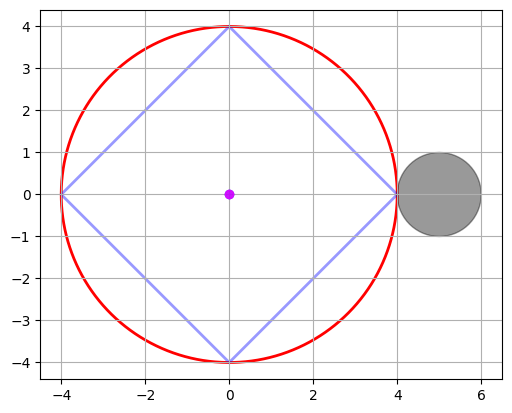

In [14]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [15]:
n = 50000

cpts = []
opts = []
ang = []

maxdst = 0.0
maxi = 0
for i in range(n):
    phi = (i / n)*2.0*pi
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    opts.append(opt)
    ang.append(phi)

In [16]:
plgs = []
ptss = []
trcplgs = []
trcptss = []

for j in range(steps+1):
    if j < steps:
        pt = []
        trcpt = []
        for i in range(len(ang)):
            dlt = sqrt((opts[i].x-cpts[i].x)**2+(opts[i].y-cpts[i].y)**2)
            if dlt < (j+1)*delta:
                pt.append(cpts[i])
                trcpt.append(Point(cpts[i].x+R*cos(ang[i]), cpts[i].y+R*sin(ang[i])))
            else:
                x = cpts[i].x+(opts[i].x-cpts[i].x)*(1.0-delta*(j+1)/dlt)
                y = cpts[i].y+(opts[i].y-cpts[i].y)*(1.0-delta*(j+1)/dlt)
                pt.append(Point(x, y))
                x += R*cos(ang[i])
                y += R*sin(ang[i])
                trcpt.append(Point(x, y))
        ptss.append(pt)
        plgs.append(LinearRing(pt))
        trcptss.append(trcpt)
        trcplgs.append(LinearRing(trcpt))
    else:
        pt = []
        trcpt = []
        for i in range(len(ang)):
            pt.append(cpts[i])
            trcpt.append(Point(cpts[i].x+R*cos(ang[i]), cpts[i].y+R*sin(ang[i])))
        ptss.append(pt)
        plgs.append(LinearRing(pt))
        trcptss.append(trcpt)
        trcplgs.append(LinearRing(trcpt))
    

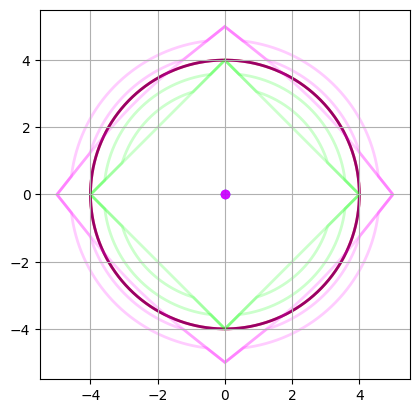

In [17]:
plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0,1,0), alpha=0.2)
for j in range(steps+1):
    plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.2)
plt.show()

In [18]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
x = []
y = []
dst = []
n = 1000

dst.append(0.0)
for j in range(steps+1):
    pt1 = affinity.rotate(trcplgs[j], 0.0, origin=Point(0.0,0.0)).intersection(ln)
    for i in range(1, n):
        angle = i*360.0/n+360.0*j
        pt2 = affinity.rotate(trcplgs[j], angle, origin=Point(0.0,0.0)).intersection(ln)
        x.append(angle)
        y.append(pt2.x)
        dst.append(dst[-1]+sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2))
        pt1 = pt2

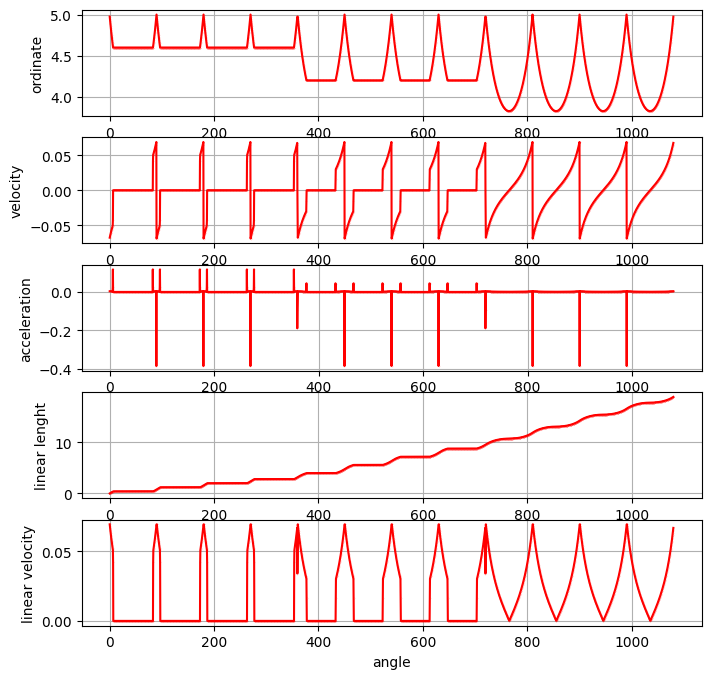

In [19]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]
dst1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, dst[1:], dst)]

fig, axs = plt.subplots(5, 1)
fig.set_size_inches(8.0, 8.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

axs[3].plot(x, dst[:-1], marker='.', color="red", markersize=0.1)
axs[3].set_ylabel('linear lenght')
axs[3].grid(True)

axs[4].plot(x[:-1], dst1, marker='.', color="red", markersize=0.1)
axs[4].set_xlabel('angle')
axs[4].set_ylabel('linear velocity')
axs[4].grid(True)

plt.show()